# Airline Customer Satisfaction Analysis


## 1. Introduction 


### Problem statement 

The airline firms are exposed to high volumes of customer reviews with structured information such as ratings related to seating comfort, in-flight services, and value for money, as well as unstructured written feedback. While such information is rich in insight about passenger satisfaction and recommendation patterns, it is likely that in practical scenarios, review datasets are messy, incomplete, and not consistent. Some of the challenges exhibited in such datasets are incomplete information, mixed types of information, empty and duplicate information, and inconsistent text format, making it challenging to analyze such information accurately without processing it in advance. However, this project will ensure airlines identify critical factors for overall ratings and likely recommendations of passengers through applying business analytics concepts in pre-processing and analyzing an airline reviews dataset.

### Aim


To clean and prepare airline customer review data for analysis and explore the key service factors and passenger characteristics associated with overall satisfaction and airline recommendation outcomes.

### Objectives

1) Load and audit the dataset in Pandas by inspecting its structure, identifying missing/invalid values, and assessing data quality issues that affect analysis reliability.

2) Clean and prepare the data by removing empty records, handling missing values, standardising categorical/text fields, and converting key variables (overall rating, service ratings, dates, and recommendation status) into analysis-ready formats.

3) Analyse and visualise the relationship between service rating categories (seat comfort, cabin service, food & beverages, entertainment, value for money) and overall satisfaction and recommendation outcomes.

### Tools and Techniques

TThe data processing and analysis were carried out in Python using a range of tools. 

Pandas : the main library used for tasks such as data cleaning, transformation, grouping, aggregation, and feature engineering.

NumPy: to conduct mathematical computations, as well as to manage missing data. 

The data visualization libraries *Matplotlib* & *Seaborn*. - The statistical analysis techniques include descriptive statistics, confidence intervals, correlation analysis, variance analysis, & hypothesis tests.



### Data Collection 

The present project uses the capstone_airline_reviews3.xlsx dataset, comprised of real airline customer reviews and rating scores: overall rating, seat comfort, cabin service, food & beverages, and value for money. Useful information about customers is also included in this dataset: for example, traveller type, cabin class, route, and recommending or not recommending an airline.

I have selected this dataset because this problem characterizes a real-world business problem, focusing on what aspects drive customer satisfaction in the airline industry. It's also suitable for an assignment because such data isn't "perfect" and calls for proper cleaning; missing values, inconsistent entries mixed format require being preprocessed before analysis is conducted.

The dataset was downloaded from a public online repository called Kaggle, which has become a common source where open datasets are shared for research and analytics.

### 2. Data Loading and Cleaning 

Overview of Dataset:
The airline customer reviews dataset used in this project incorporates passenger ratings and written feedback. It is comprehensive, with both structured variables of ratings and categorical fields such as airline, cabin class, and traveller type that are appropriate for analysis of customer satisfaction and recommendation behavior.

Key columns include:airline ,overall ,seat_comfort, cabin_staff_service, food_bev, inflight_entertainment, value_for_moneyy ,traveller_type, cabin, route, aircraft ,recommended,customer_review ,review_date / date_flown 


### Data Cleaning

• Loading the Dataset: The Excel file in which the data is available is imported into a pandas dataframe named 'df'.

• Initial Data Audit: The first operation that has been carried out on the given dataset is checking its number of rows/columns, number of types, missing values in it, as well as its overall quality-related problems.

• Missing and Empty Records Handling: Empty records as well as records containing missing data for critical parameters were deleted in order for the final dataset to have meaningful data for analysis.

• Standardization of Data Formats: The important columns were processed for trimming the textual fields. The categories were standardized. This prevented irregular categories while analyzing.

• Data Type Conversions: Rating-type columns were changed to a numerical data form, and date variables were arranged in a standard form if applicable.

• Formatting of Recommendation Field: The recommendation field was standardized for analysis of the recommendation behavior of the customers.

### Performance Analysis

• Overall distribution of customer satisfaction scores.
    
• Airline-level comparison of average ratings.
    
• Customer satisfaction differences by traveller type and cabin class.
    
• Relationship between service category ratings and overall satisfaction/recommendation patterns.

### Visualize results

Used Bar Charts, error bar chart, Line Charts, Scatter plot, Heatmap , violin plot,

### 3. Data Cleaning and Analysis

In [51]:
# Import core libraries for data handling (Pandas), numerical operations (NumPy),
# visualisation (Matplotlib/Seaborn), and statistical testing (SciPy).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t, ttest_ind

# Define configuration values to control analysis settings such as rating limits,
# minimum reviews per airline, and rolling average window for trends.

CONFIG = {
    "min_reviews": 30,
    "confidence_level": 0.95,
    "rolling_window": 3,
    "rating_min": 0,
    "rating_max": 10
}

MIN_REVIEWS = CONFIG["min_reviews"]


#### Step 1: Load the dataset and perform the initial inspection
Loading the dataset:
The data was read using the Excel file (capstone_airline_reviews3.xlsx) through the pd.read_excel

Previewing a Dataset:
The first several rows were presented by employing the .head() method in order to comprehend the data and point out important columns like airline, overall rating, category ratings, and recommendation.
Verifying the structure of datasets and their types: .shape and .info() were employed for determining the number of records and the number of columns, while verifying if the columns were stored in numerical, categorical, or text formats. 

Annotation: 
This is a crucial process, since real-world data can be very inconsistent, featuring missing data, wrong data types (for instance, ratings having been submitted as text), and incomplete records, among others. This knowledge is essential in determining the data processing and analysis that follows, since it is based on accurate data.


In [52]:
reviews = pd.read_excel('capstone_airline_reviews3.xlsx')

# Initial inspection
print("Initial dataset shape:", reviews.shape)
display(reviews.head())


Initial dataset shape: (131895, 17)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### step 2: Identify and Handle Missing Values

Objective: To handle missing and invalid values so the dataset remains accurate and suitable for analysis.

Process:

• The missing values were analyzed for incomplete columns.

• Invalid rating and date values have been changed to missing values by setting errors="coerce".

• Rows with non-available critical information like airline or overall rating were deleted with dropna(subset=[ "airline","overall"]).

• Missing data in non-CI fields (route, aircraft, for example) was retained in order not to remove data unnecessarily. Missing values can lower the quality of analysis to produce inaccurate outputs. Excluding records missing essential values ensures valid comparison, but excluding values not necessary for analysis ensures that valuable review information is retained.

In [53]:
# Convert date columns
reviews["review_date"] = pd.to_datetime(reviews["review_date"], errors="coerce")
reviews["date_flown"] = pd.to_datetime(reviews["date_flown"], errors="coerce")


#### Step 3: Standardise and Convert Key Variables


Objective: To prepare the dataset for analysis by converting rating fields into numeric format and standardising categorical text fields.

Process:    
    
• Rating columns (overall and service category ratings) were converted to numeric using pd.to_numeric(errors="coerce").
    
• Invalid rating values were converted into missing values (NaN) to maintain consistency.
    
• Text-based categorical fields (airline, traveller type, cabin, route, aircraft) were cleaned using a clean_text() function to remove extra spaces and standardise formatting.

Explanation:
Numeric conversion ensures ratings can be used for calculations such as averages and correlations, while standardising cate

In [54]:
# Convert rating columns to numeric
rating_cols = [
    "overall", "seat_comfort", "cabin_service",
    "food_bev", "entertainment", "ground_service",
    "value_for_money"
]

for col in rating_cols:
    reviews[col] = pd.to_numeric(reviews[col], errors="coerce")

In [55]:
# Clean text-based categorical fields
def clean_text(x):
    if pd.isna(x):
        return np.nan
    return " ".join(str(x).strip().split())

for col in ["airline", "traveller_type", "cabin", "route", "aircraft"]:
    reviews[col] = reviews[col].apply(clean_text)

#### Step 4: Feature Engineering and Final Dataset Preparation

Objective: To finalise a clean, analysis-ready dataset by engineering key features, removing duplicates, and filtering reviews to 2006–2019.

Process:

• A binary variable (recommended_bin) was created using the suggested column so that it could be analyzed numerically.

• A feature named “A Year” was derived from the review_date to conduct time-related analysis.

• The duplicate observations were eliminated by the use of drop_duplicates().

• Reviews considered were filtered to include the dates 2006-2019. Missing years were also retained where applicable.

• Rows without key variables (airline or overall rating) respectively dropped as follows:. dropna(subset=["airline","overall • A validation check is done to make sure that the ratings are within the expected scale. Explanation: These measures enhance the reliability of the dataset by establishing consistent formats, eliminating bias in the data by reducing duplication, considering the specific time frame, and deploying variable preparation for trend analysis and recommendations.

In [56]:
# Encode recommendation field into binary form
def to_binary(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower()
    if x in ["yes", "recommended", "true", "1"]:
        return 1
    if x in ["no", "not recommended", "false", "0"]:
        return 0
    return np.nan

reviews["recommended_bin"] = reviews["recommended"].apply(to_binary)

In [57]:
# Feature engineering: extract year
reviews["Year"] = reviews["review_date"].dt.year

# Remove duplicates and filter years
before_rows = reviews.shape[0]

reviews = reviews.drop_duplicates()
reviews = reviews[
    (reviews["Year"].isna()) |
    ((reviews["Year"] >= 2006) & (reviews["Year"] <= 2019))
]

clean_reviews = reviews.dropna(subset=["airline", "overall"]).copy()

after_rows = clean_reviews.shape[0]

print("Rows before cleaning:", before_rows)
print("Rows after cleaning:", after_rows)

# Data validation checks
assert clean_reviews["overall"].between(
    CONFIG["rating_min"], CONFIG["rating_max"]
).all(), "Rating values out of bounds"


Rows before cleaning: 131895
Rows after cleaning: 59401


#### Analysis 1 - Top Airlines Based on Weighted Rating with Confidence Intervals
**Objective:**

"To rank the best airlines using weighted customer ratings and present the reliability of their ratings using confidence intervals."

**Process:**

Grouped the data based on airlines in calculating avg_overall, review_count, and rating_std.

Removed the airlines that have reviewed less than MIN_REVIEWS.

Assessed confidence intervals (ci_lower, ci_upper) for the general rating of each airline.

Calculated a `weighted_rating` based on the airline mean and global mean.

Sorted the airlines based on the variable 'weighted_rating' to pick out the first 10

**Visualization:**

Used the error bar chart of Matplotlib (plt.errorbar) to plot the top airlines.

X-axis: Airline names | Y-axis: Weighted ratings

The error bars indicate the confidence interval.

**Insight:**

Wherein, more weighted ratings mean more satisfied carriers and adequate review submissions.

The smaller the interval, the more consistent the experiences are. Larger intervals convey less certainly.

In [58]:
# Airline-level aggregation
airline_stats = (
    clean_reviews.groupby("airline")
    .agg(
        avg_overall=("overall", "mean"),
        rating_std=("overall", "std"),
        review_count=("overall", "size")
    )
    .query("review_count >= @MIN_REVIEWS")
    .reset_index()
)

# Confidence interval function
def confidence_interval(series, confidence=CONFIG["confidence_level"]):
    n = len(series)
    mean = series.mean()
    se = sem(series)
    h = se * t.ppf((1 + confidence) / 2., n - 1)
    return pd.Series({"ci_lower": mean - h, "ci_upper": mean + h})

# FIXED confidence intervals
ci_df = (
    clean_reviews.groupby("airline")["overall"]
    .apply(confidence_interval)
    .unstack()
    .reset_index()
)

airline_stats = airline_stats.merge(ci_df, on="airline", how="inner")

# Weighted rating
global_mean = clean_reviews["overall"].mean()

airline_stats["weighted_rating"] = (
    (airline_stats["review_count"] * airline_stats["avg_overall"] +
     MIN_REVIEWS * global_mean) /
    (airline_stats["review_count"] + MIN_REVIEWS)
)

# Top airlines
top_airlines = airline_stats.sort_values(
    "weighted_rating", ascending=False
).head(10)

display(top_airlines)


,airline,avg_overall,rating_std,review_count,ci_lower,ci_upper,weighted_rating
37,Garuda Indonesia,8.289367,2.101465,743,8.138017,8.440718,8.168106
29,EVA Air,8.107075,2.162907,523,7.921276,8.292874,7.947461
18,Asiana Airlines,8.054299,2.238955,442,7.844995,8.263602,7.870648
26,China Southern Airlines,7.777973,2.277991,1707,7.669832,7.886114,7.732842
0,ANA All Nippon Airways,7.871520,2.354017,467,7.657464,8.085577,7.708141
2,Aegean Airlines,7.780347,2.716658,519,7.546078,8.014616,7.637424
45,Korean Air,7.621677,2.675408,489,7.383959,7.859395,7.479665
54,Qatar Airways,7.489153,2.518709,1429,7.358452,7.619854,7.441361
21,Bangkok Airways,7.596045,2.730187,354,7.310661,7.881430,7.406109
60,Singapore Airlines,7.466793,2.746030,1054,7.300822,7.632764,7.403087


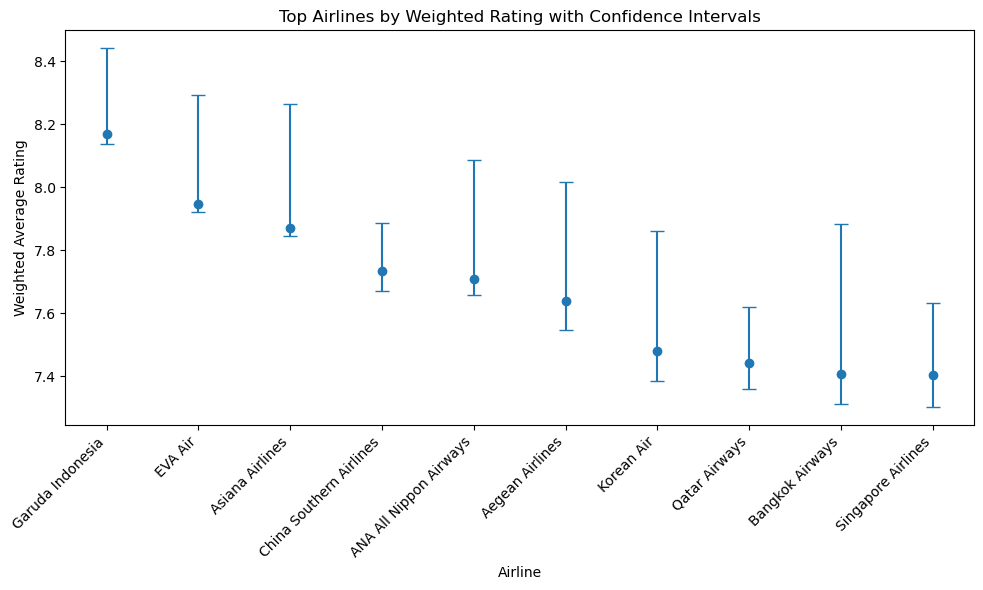

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.errorbar(
    top_airlines["airline"],
    top_airlines["weighted_rating"],
    yerr=[
        top_airlines["weighted_rating"] - top_airlines["ci_lower"],
        top_airlines["ci_upper"] - top_airlines["weighted_rating"]
    ],
    fmt="o",
    capsize=5
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Airline")
plt.ylabel("Weighted Average Rating")
plt.title("Top Airlines by Weighted Rating with Confidence Intervals")

plt.tight_layout()
plt.show()


#### Analysis 2 - Satisfaction and Consistency of Airline Services
**Objective:**

To explore which airlines have shown a stable level of service quality when comparing rating differences across airlines.

**Process:**

Calculated variability for each airline using rating_std (standard deviation).

Calculated the coefficient of variation (rating_std / avg_overall) for measuring the stability in relation to average rating.

Plotted airlines using avg_overall and rating_std: comparison of satisfaction vs consistency.

Introduced the median reference lines to differentiate the carriers into performance quadrants.

**Visualisation:**

Used Matplotlib Scatter plot function (plt.scatter).

X-axis: Average overall rating (avg_overall

Y-axis: Rating variability (rating_std

The dashed lines indicate medians, allowing for easier detection of carriers with strong satisfaction levels but low dispersion.

**Insight:**

The airlines in the higher rating/low variability category are the most consistent service providers.

Airlines that are highly variable provide a mixed experience despite their high overall rating.

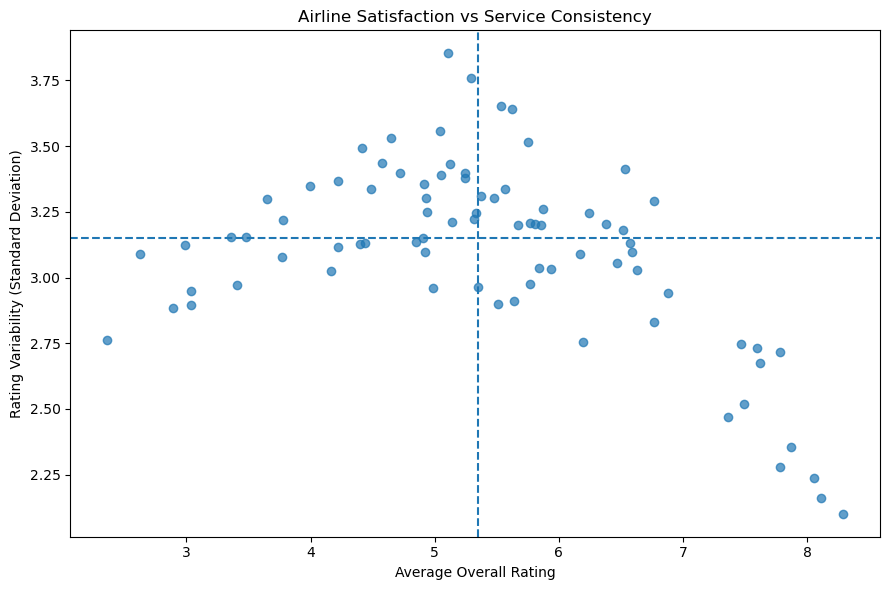

In [60]:
# Coefficient of variation
airline_stats["coef_variation"] = (
    airline_stats["rating_std"] / airline_stats["avg_overall"]
)

# Scatter plot: satisfaction vs consistency
plt.figure(figsize=(9,6))
plt.scatter(
    airline_stats["avg_overall"],
    airline_stats["rating_std"],
    alpha=0.7
)

plt.axhline(airline_stats["rating_std"].median(), linestyle="--")
plt.axvline(airline_stats["avg_overall"].median(), linestyle="--")

plt.xlabel("Average Overall Rating")
plt.ylabel("Rating Variability (Standard Deviation)")
plt.title("Airline Satisfaction vs Service Consistency")
plt.tight_layout()
plt.show()


#### Analysis 3 - Rating vs Recommendation Alignment (Rating–Recommendation Gap)

**Objective :**

To determine if increased ratings of customer satisfaction are also associated with increased willingness to recommend the airline.

**Process:**

Only kept reviews with a valid recommended_bin value.

Binned by airline to calculate:

`recommend_rate`  … average of

Integrated recommendation scores with airline rating stats.

Airline filtering by MIN_REVS criteria for equal comparison purposes.

Computed the rating-recommendation gap

avg_overall – (recommend_rate × 10) (recommendation scaled to fit satisfaction scale ranging from 0-10).

Chose the top 10 airlines with the largest gap.

**Visualisation :**

Used Matplotlib bar chart (plt.bar) to show the top 10 airlines with the greatest rating vs. recommendation gap.

X-axis: airline name, Y-axis: Gap between rating

**Insight:**

A greater gap may imply that customers are likely to provide fair reviews but are less likely to encourage other customers to use this airline. This is an implication that there may be concerns regarding loyalty (value, reliability, or trust) that are not captured by the overall stars given.

In [61]:
# ANALYSIS 3: RECOMMENDATION RATE & RATING GAP
rec_df = clean_reviews.dropna(subset=["recommended_bin"])

# Airline-level recommendation statistics
rec_rate = (
    rec_df.groupby("airline")
    .agg(
        recommend_rate=("recommended_bin", "mean"),
        rec_review_count=("recommended_bin", "size")
    )
    .reset_index()
)

# Merge with airline performance statistics
merged = airline_stats.merge(
    rec_rate,
    on="airline",
    how="inner"
)

# Apply minimum review threshold (based on recommendation data)
merged = merged[merged["rec_review_count"] >= MIN_REVIEWS]

# Rating–Recommendation Gap
# Overall rating is on a 0–10 scale
# Recommendation rate (0–1) scaled to 0–10
merged["rating_recommend_gap"] = (
    merged["avg_overall"] - (merged["recommend_rate"] * 10)
)

# Display airlines with the largest gaps
display(
    merged.sort_values("rating_recommend_gap", ascending=False).head(10)
)


,airline,avg_overall,rating_std,review_count,ci_lower,ci_upper,weighted_rating,coef_variation,recommend_rate,rec_review_count,rating_recommend_gap
8,Air Canada rouge,3.036822,2.894625,1032,2.860010,3.213633,3.096936,0.953176,0.185841,1017,1.178415
64,Sunwing Airlines,3.477509,3.154103,578,3.219834,3.735183,3.560766,0.907001,0.250000,568,0.977509
47,LATAM Airlines,3.766520,3.077628,227,3.364004,4.169036,3.929750,0.817101,0.284404,218,0.922483
73,United Airlines,3.034259,2.947946,2773,2.924489,3.144029,3.057062,0.971554,0.214075,2714,0.893507
17,American Airlines,2.888772,2.883956,2841,2.782679,2.994864,2.912555,0.998333,0.200654,2751,0.882228
33,Etihad Airways,4.399065,3.129259,1283,4.227674,4.570455,4.416562,0.711346,0.352426,1257,0.874801
36,Frontier Airlines,2.360882,2.761717,1452,2.218712,2.503051,2.417642,1.169782,0.154386,1425,0.817022
63,Spirit Airlines,2.628642,3.089097,2849,2.515162,2.742121,2.655070,1.175169,0.181622,2786,0.812418
34,Eurowings,3.403226,2.971986,248,3.031518,3.774934,3.593330,0.873285,0.267490,243,0.728329
76,WOW air,2.984429,3.122807,578,2.729311,3.239547,3.092016,1.046367,0.226040,553,0.724031


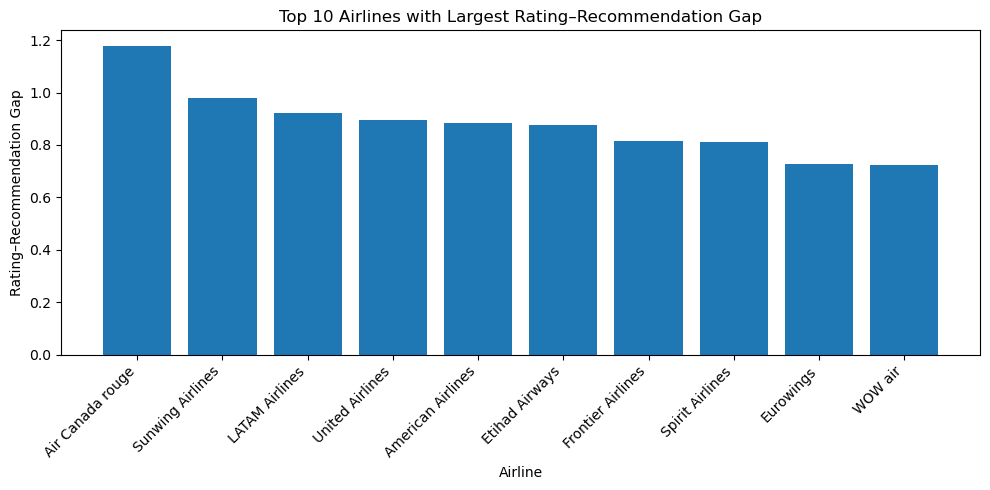

In [62]:
# Top 10 airlines with largest rating–recommendation gap
gap_top10 = merged.sort_values(
    "rating_recommend_gap", ascending=False
).head(10)

plt.figure(figsize=(10,5))
plt.bar(
    gap_top10["airline"],
    gap_top10["rating_recommend_gap"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Airline")
plt.ylabel("Rating–Recommendation Gap")
plt.title("Top 10 Airlines with Largest Rating–Recommendation Gap")
plt.tight_layout()
plt.show()


#### Analysis 4 - Customer Satisfaction Trend Over Time (2006-2019)
**Objective:**

In order to analyze the current state of overall customer satisfaction in the airline industry and identify where improvements or declines have occurred over the years.

**Process:**

The cleaned dataset was categorized according to the year as follows:

avg_overall (mean of overall scores per year)

review count (number of reviews per year)

Applied 3-year moving mean calculation (rolling(3).mean()) to filter out monthly fluctuations in favor of trending output values.

**Visualisation:**

Used line chart from Matplotlib (plt.plot) with:

Yearly Average ratings (raw yearly trend)

3-Year Rolling Average (smoothed trendline

X-axis: Year 

Y-Axis: Average Overall Rating

**Insight:**

This line shows the changes in the level of satisfaction over time.
The

Rolled Average
The rolling average provides much more clarity regarding general trends and is much easier to use to select trends of improvements or deterioration

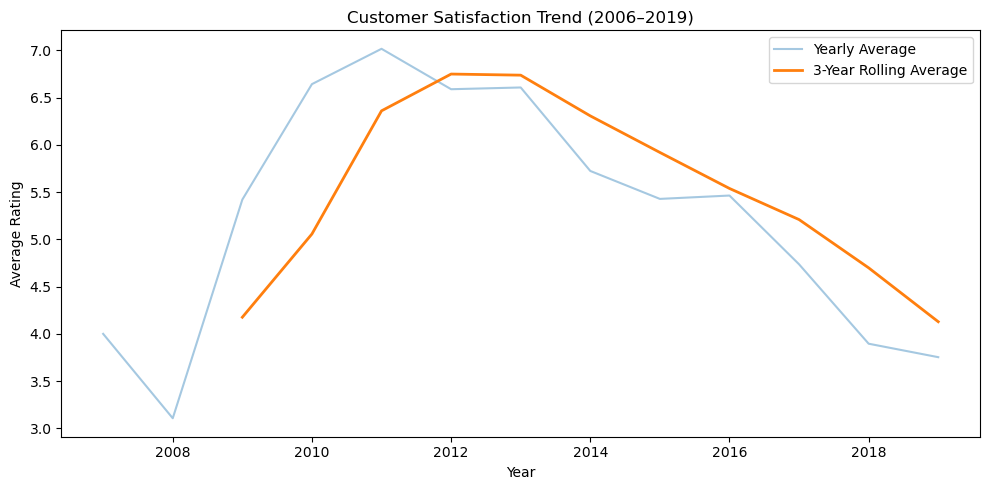

In [63]:
# ANALYSIS 4: CUSTOMER SATISFACTION TREND (ROLLING AVERAGE)

yearly = (
    clean_reviews.dropna(subset=["Year"])
    .groupby("Year")
    .agg(
        avg_overall=("overall", "mean"),
        review_count=("overall", "size")
    )
    .reset_index()
    .sort_values("Year")
)

# Rolling average to smooth short-term fluctuations
yearly["rolling_avg"] = yearly["avg_overall"].rolling(3).mean()

plt.figure(figsize=(10,5))
plt.plot(yearly["Year"], yearly["avg_overall"], alpha=0.4, label="Yearly Average")
plt.plot(yearly["Year"], yearly["rolling_avg"], linewidth=2, label="3-Year Rolling Average")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Customer Satisfaction Trend (2006–2019)")
plt.legend()
plt.tight_layout()
plt.show()


#### Analysis 5 -  Dimensions of Service Quality that Influence Overall Satisfaction
**Objective:**

Observe what service quality factors - seat comfort, cabin service, food, entertainment, ground service, value for money - most strongly relate to the overall customer rating.

**Process:**

Selected columns for key ratings - overall and service-related dimensions:

Dropped rows containing N/A with dropna() in order to compare the correlation fairly.

Computing the correlation matrix with corr().

It ranked service dimensions in terms of their strengths of association with overall rating.

**Visualization:**

Showed through the use of a Seaborn heatmap the correlations between overall satisfaction and service factors.

Values have been annotated to ensure that strong and weak relationships are easy to interpret.

**Insight:**

Service dimensions with higher positive correlation values represent the strongest drivers of overall satisfaction.

Lower correlations should imply a relatively weaker influence on the overall customer rating compared with other factors.

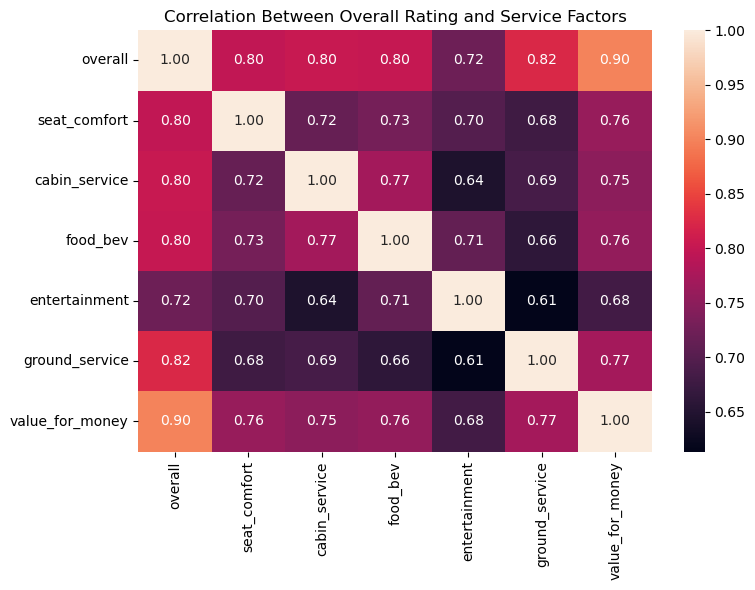

,Service Dimension,Correlation with Overall
0,value_for_money,0.899028
1,ground_service,0.824227
2,cabin_service,0.803475
3,food_bev,0.802020
4,seat_comfort,0.796913
5,entertainment,0.720724


In [64]:
# ANALYSIS 5: SERVICE QUALITY KEY DRIVERS (CORRELATION)

corr_cols = [
    "overall", "seat_comfort", "cabin_service", "food_bev",
    "entertainment", "ground_service", "value_for_money"
]

# Remove rows with missing values for fair comparison
corr_df = clean_reviews[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Visualise correlations using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Between Overall Rating and Service Factors")
plt.tight_layout()
plt.show()

# Rank service dimensions by correlation with overall rating
overall_corr = (
    corr_matrix["overall"]
    .drop("overall")
    .sort_values(ascending=False)
    .reset_index()
)

overall_corr.columns = ["Service Dimension", "Correlation with Overall"]

display(overall_corr)

#### Analysis 6 - Passenger Segment Analysis (Traveller Type) + T-Test

**Objective :**
For comparability of the levels of satisfaction among various types of customers (e.g. Business, Couple Leisure, Family Leisure, Solo Leisure), to determine whether the variation in levels of satisfaction is significant.

**Process** (What the code does):

A filter is applied to eliminate any missing factors in traveller_type.

Reviews are categorized based on traveller_type to compute:

Average Overall Rating

Reviews per Segment

**Visualisation:**

A violin plot (Seaborn + Matplotlib) displays:

x-axis: Traveller Type

y-axis: Overall Rating

The shape/spread of each violin shows how ratings vary within each segment (wide areas = more common ratings).

A violin plot is generated using Seaborn (sns.violinplot) for visualizing the distribution of the scores for each group of travellers.

An independent two-sample t-test (ttest_ind) is conducted on Business vs. Leisure ratings to see if there is a significant difference.

The spread of each violin represents the distribution of ratings for each group (wider sections are common ratings).

**Insight:**

Traveller types may display varied levels of satisfaction, implying that the airline may require distinct service approaches for business and non-business (leisure) traveller segments.

The violin plot indicates the scales on which groups of results are more consistent and which groups of results have varying outcomes.

This t-test result confirms whether the difference in student satisfaction between Business and Leisure is a fact or a result of random variation.

,traveller_type,avg_overall,review_count
0,Business,4.467771,6764
1,Couple Leisure,4.362202,9699
2,Family Leisure,4.340941,7142
3,Solo Leisure,5.102053,13934


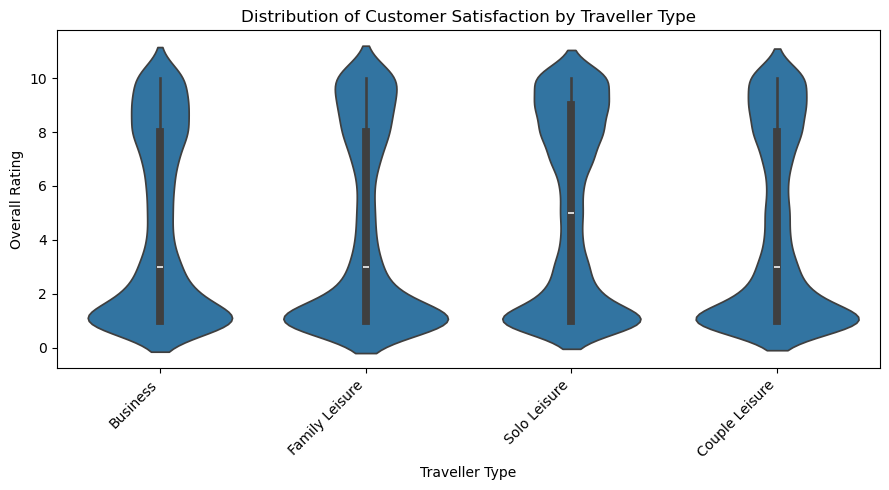

T-test (Business vs Leisure): TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))


D:\Camera\py\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [65]:
# ------------------------------------------------------------
# ANALYSIS 6: PASSENGER SEGMENT ANALYSIS + T-TEST
# ------------------------------------------------------------
segment_summary = (
    clean_reviews.dropna(subset=["traveller_type"])
    .groupby("traveller_type")
    .agg(avg_overall=("overall", "mean"), review_count=("overall", "size"))
    .reset_index()
)

display(segment_summary)



plt.figure(figsize=(9,5))

sns.violinplot(
    data=clean_reviews.dropna(subset=["traveller_type"]),
    x="traveller_type",
    y="overall"
)

plt.title("Distribution of Customer Satisfaction by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Statistical test: Business vs Leisure
business = clean_reviews[clean_reviews["traveller_type"] == "Business"]["overall"].dropna()
leisure = clean_reviews[clean_reviews["traveller_type"] == "Leisure"]["overall"].dropna()

ttest_result = ttest_ind(business, leisure, equal_var=False)
print("T-test (Business vs Leisure):", ttest_result)

### 4. Conclusion 

This analysis has been successful in converting the basic airline review data to a format ready for analysis by removing duplication in data, including only the appropriate timeframe (2006 to 2019), and ensuring the availability of authentic data for meaningful comparisons. It is evident from this study that a customer's level of satisfaction is not constant and varies from airline to airline as well as over time. By applying weighted ratings with confidence intervals, airlines have been found to have been judged more justly in their overall performance by negating any discrepant effects resulting from fewer reviews, and consistency analysis has made airlines stand out for more authentic service delivery in terms of overall consistency despite averaging similar performance levels. Furthermore, comparisons between customer satisfaction levels and their recommendatory practices have demonstrated a disparity in airlines with outstanding performance levels in customer satisfaction yet lacking in recommendatory intentions in customer expectations and trust levels. Moreover, correlation analysis clearly explains correlation outcomes in establishing performance differences in various airlines with value for money and cabin service aspects to be core improvement fields for airlines to enhance customer satisfaction levels.

### 5. References

Dataset – Kaggle: Efehan Danisman (n.d.) Skytrax Airline Reviews dataset. 
https://www.kaggle.com/datasets/efehandanisman/skytrax-airline-review  

McKinney, W. (2010) Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference (SciPy 2010)
https://conference.scipy.org/proceedings/scipy2010/mckinney.html


Pandas Development Team (n.d.) pandas documentation.
https://pandas.pydata.org/docs/

NumPy Developers (n.d.) NumPy documentation.
https://numpy.org/doc/


Matplotlib Development Team (n.d.) Matplotlib documentation.
https://matplotlib.org/stable/


Waskom, M. (2021) Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021. https://joss.theoj.org/papers/10.21105/joss.03021



### 6. Appendices

#### Appendix A: Dataset Description

The dataset contains Skytrax airline reviews, including airline name, traveller type, cabin class, service ratings, overall rating, recommendation status, and review dates.

#### Appendix B: Data Cleaning Summary

Key preprocessing steps included date and numeric conversion, standardising text fields, encoding recommendation into binary format, removing duplicates, filtering reviews (2006–2019), and dropping rows with missing critical fields.

#### Appendix C: Additional Outputs

Additional tables and visual outputs include airline ranking results, rating consistency analysis, recommendation gap comparisons, satisfaction trends, and correlation-based service driver analysis.

### AI Statement

Artificial intelligence tools were incorporated in a complementary fashion during the process of working on this assignment. The role of AI was to aid in the comprehension of analytical methodologies, enhancing the structure of the codes, increasing the clarity of the language in stating the explanations, and aiding in the decisions of the visual representation of the data. The entire process of choosing the data, analysis, interpretation of results, and conclusions was the responsibility of the student.